## Training Linear Models

---

### Importando Bibliotecas

In [64]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.base import clone

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Função para Salvar Imagens

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Equação Normal

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [5]:
# Calculando o inverso da Matriz usando o "inv()" e utilizando o método "dot()" para multiplicação de Matriz

X_b = np.c_[np.ones((100, 1)), X] # Adiciona x0 = 1 em casa instância
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.74431764],
       [3.24722358]])

Saving figure generated_data_plot


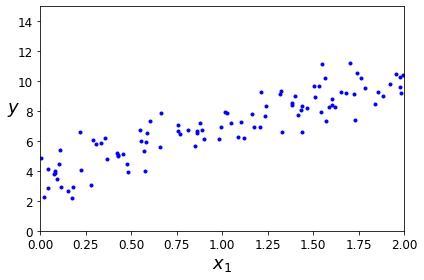

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

### Plotando as Predições para o Modelo

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]   # Adiciona x0 = 1 para cada instância
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.74431764],
       [10.2387648 ]])

Saving figure predictions_data_plot


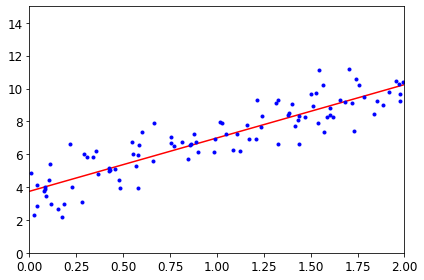

In [9]:
# Plotando a predição deste Modelo

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
save_fig("predictions_data_plot")
plt.show()

### Usando Scikit-Learn

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.74431764]), array([[3.24722358]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.74431764],
       [10.2387648 ]])

### Chamando a Função lstsq() diretamente, que calculará o "Mínimos Quadrados"

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.74431764],
       [3.24722358]])

### Calculando o Pseudo-Inverso direamente

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.74431764],
       [3.24722358]])

### Complexidade Computacional

#### Implementação do Gradiente Descendente:

In [14]:
eta = 0.1 # Taxa de Aprendizagem
n_interations = 1000
m = 100
theta = np.random.randn(2, 1) # Inicialização Aleatória

In [15]:
for iteration in range(n_interations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[3.74431764],
       [3.24722358]])

### Implementação do Gradiente Descendente Estocástico

#### Utilizando um cronograma de aprendizado simples:

In [17]:
n_epochs = 50
t0, t1 = 5, 50   # Hiperparâmetros do cronograma de aprendizado

In [18]:
def learning_schedule(t):
    return t0 / (t + t1)

In [19]:
theta = np.random.randn(2, 1)   # Inicialização Aleatória

In [20]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

In [21]:
theta

array([[3.73449173],
       [3.17571972]])

### Implementando SGD

In [22]:
sgd_red = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_red.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_red.intercept_, sgd_red.coef_

(array([3.73813401]), array([3.24809463]))

### Regressão Polinomial

In [35]:
m = 200 # Número de Instâncias
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


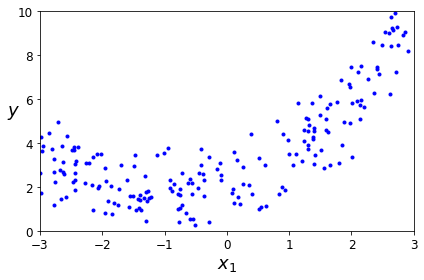

In [36]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [37]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.99868387])

In [38]:
X_poly[0]

array([1.99868387, 3.99473722])

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.08580527]), array([[0.9740722 , 0.50011074]]))

Saving figure quadratic_predictions_plot


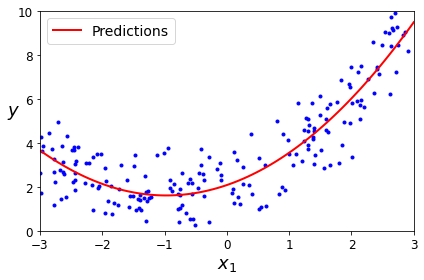

In [40]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

### Curvas de Aprendizado

In [41]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)                   

Saving figure underfitting_learning_curves_plot


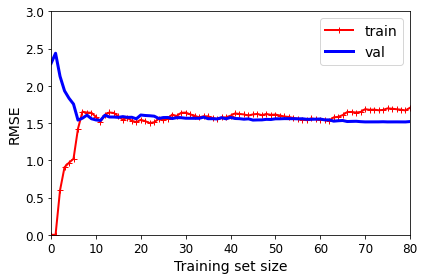

In [42]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig("underfitting_learning_curves_plot")
plt.show()

Saving figure learning_curves_plot


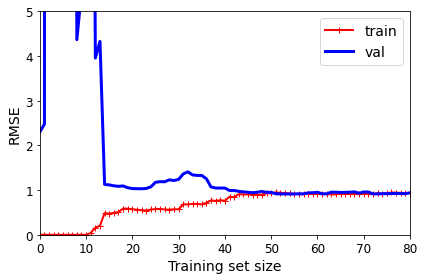

In [43]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 5])           
save_fig("learning_curves_plot")  
plt.show()                        

### Modelos Lineares Regularizados

#### Regressão de Ridge

In [44]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.97173479]])

In [45]:
# Utilizando Gradiente Descendente Estocástico
sgd_reg = SGDRegressor(penalty='12')
sgd_red.fit(X, y.ravel())
sgd_red.predict([[1.5]])

array([5.1717177])

#### Regressão de Lasso

In [47]:
# Utilizando subgradiente da função de Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.92162661])

#### Elastic Net

In [49]:
# Aplicando a Normalização de ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.92548034])

#### Implementação dos Eraly Stopping

In [54]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [53]:
# Prepara os dados
poly_scaler = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

In [56]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
x_val_poly_scaler = poly_scaler.transform(X_val)

In [59]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None

In [60]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)   # Continua de Onde Parou
    y_val_predict = sgd_reg.predict(X_train_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [61]:
best_epoch

243

### Regressão Logística

In [65]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [66]:
X = iris["data"][:, 3:]  # Largura da Pétala
y = (iris['target'] == 2).astype(np.int)   # 1 Se iris Vírginica, se não 0

/tmp/ipykernel_9229/903565582.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int)   # 1 Se iris Vírginica, se não 0


In [67]:
# Treinando o Modelo
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Saving figure Log_Reg_Iris


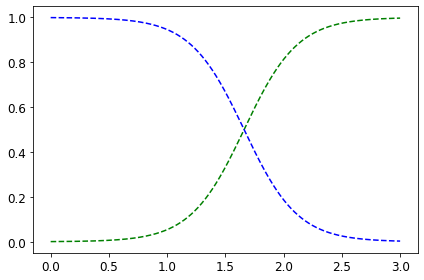

In [68]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g--", label="Iris Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Virginica")
save_fig("Log_Reg_Iris")
plt.show()

/home/gh057/Desktop/Projects/Python/venv/lib/python3.8/site-packages/matplotlib/patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


Saving figure logistic_regression_plot


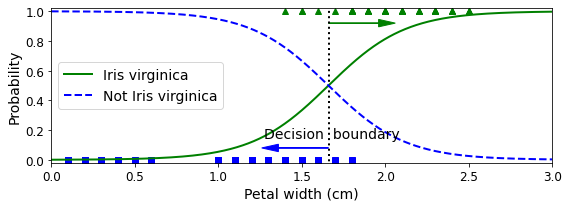

In [69]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [70]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])